#Comparitive analysis of Diabetic Prediction Based on ML Algorithms

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
res = []
res_a = []

In [182]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/Navanithbs/MachineLearning/master/Datasets/diabetes.csv', sep = ',')

In [183]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Manipulation**

In [184]:
diabetes.replace('?', np.nan, inplace=True)

In [185]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [186]:
# axis = 1 , columnwise operation
diabetes_df = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)

In [187]:
diabetes_df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31


In [188]:
diabetes_df.replace(0, np.nan, inplace=True)

In [189]:
diabetes_df.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31


**Simple Imputer**

In [190]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(diabetes_df)

In [191]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [192]:
diabetes_df2 = pd.DataFrame(X, columns = diabetes_df.columns) 

In [193]:
diabetes_df2['Pregnancies'] = diabetes.Pregnancies

In [194]:
diabetes_df2['Outcome'] = diabetes.Outcome

In [195]:
diabetes_df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1


**Correlation**

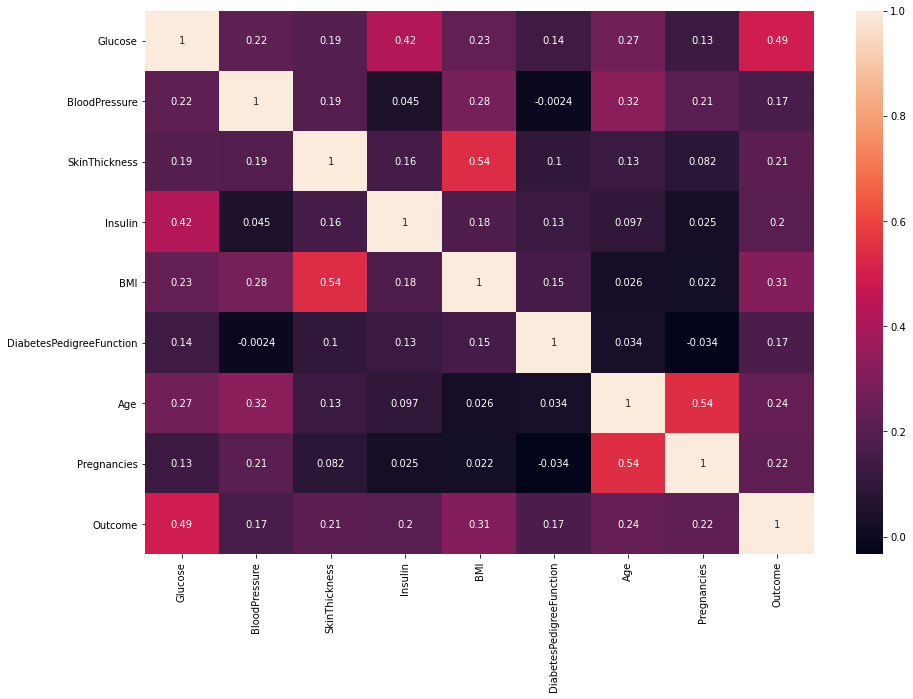

In [196]:
plt.figure(figsize=(15,10))
sns.heatmap(diabetes_df2.corr(), annot=True)

**Train & Test**

In [197]:
X_df = diabetes_df2.drop(['Outcome'], axis = 1)

In [198]:
X_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,6
1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1
2,183.0,64.0,29.0,125.0,23.3,0.672,32.0,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [199]:
Y = diabetes_df2['Outcome'] 

**Splitting the dataset into the Training set and Test set**

In [200]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split (X_df , Y, test_size = 0.25, random_state = 0) 

**Feature Scaling**

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Model**

In [202]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
aa=classifier1.score(X_train, Y_train)*100
print(aa)
res.append(int(aa))

76.21527777777779


[[117  13]
 [ 28  34]]
*********************
78.64583333333334 %


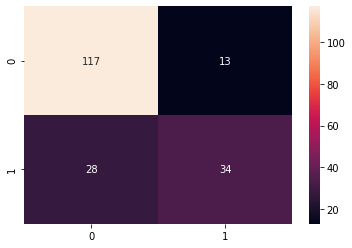

In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
a=accuracy_score(Y_test, Y_pred)*100
res_a.append(int(a))
print(a,'%')

**KNN Model**

In [205]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [206]:
bb=classifier2.score(X_train, Y_train)*100
print(bb)
res.append(int(bb))

80.72916666666666


[[110  20]
 [ 27  35]]
*********************
75.52083333333334 %


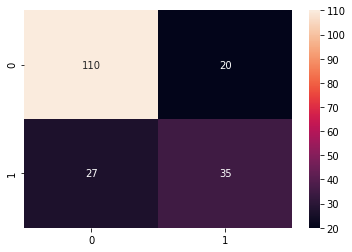

In [207]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
b=accuracy_score(Y_test, Y_pred)*100
print(b,'%')
res_a.append(int(b))

**Support Vector Machine**

In [208]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [209]:
cc=classifier3.score(X_train,Y_train)*100
print(cc)
res.append(int(cc))

76.38888888888889


[[117  13]
 [ 28  34]]
*********************
78.64583333333334 %


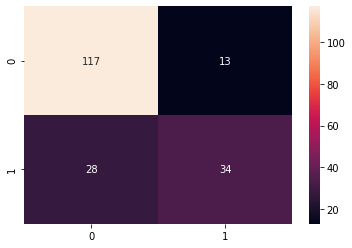

In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier3.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
c=accuracy_score(Y_test, Y_pred)*100
print(c,'%')
res_a.append(int(c))

**Random Forest Classification**

In [211]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [212]:
dd=classifier4.score(X_train, Y_train)*100
print(dd)
res.append(int(dd))

97.91666666666666


[[112  18]
 [ 28  34]]
*********************
76.04166666666666 %


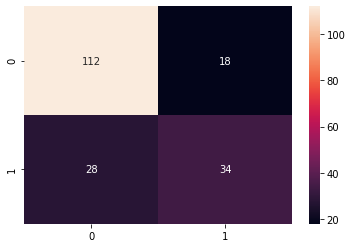

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier4.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
d=accuracy_score(Y_test, Y_pred)*100
res_a.append(int(d))
print(d,'%')

**Naive Bayes**

In [214]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [215]:
ee=classifier5.score(X_train, Y_train)*100
print(ee)
res.append(int(ee))

74.65277777777779


[[113  17]
 [ 27  35]]
*********************
77.08333333333334 %


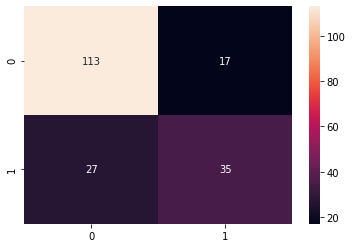

In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier5.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
e=accuracy_score(Y_test, Y_pred)*100
print(e,'%')
res_a.append(int(e))

**Decision Tree Classification**

In [217]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [218]:
ff=classifier6.score(X_train, Y_train)*100
print(ff)
res.append(int(ff))

100.0


[[101  29]
 [ 23  39]]
*********************
72.91666666666666 %


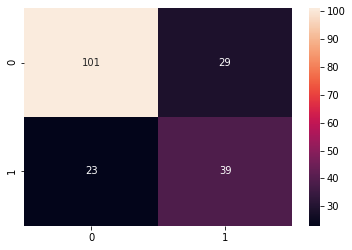

In [219]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier6.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='0.0f')
print("*********************")
f=accuracy_score(Y_test, Y_pred)*100
print(f,'%')
res_a.append(int(f))

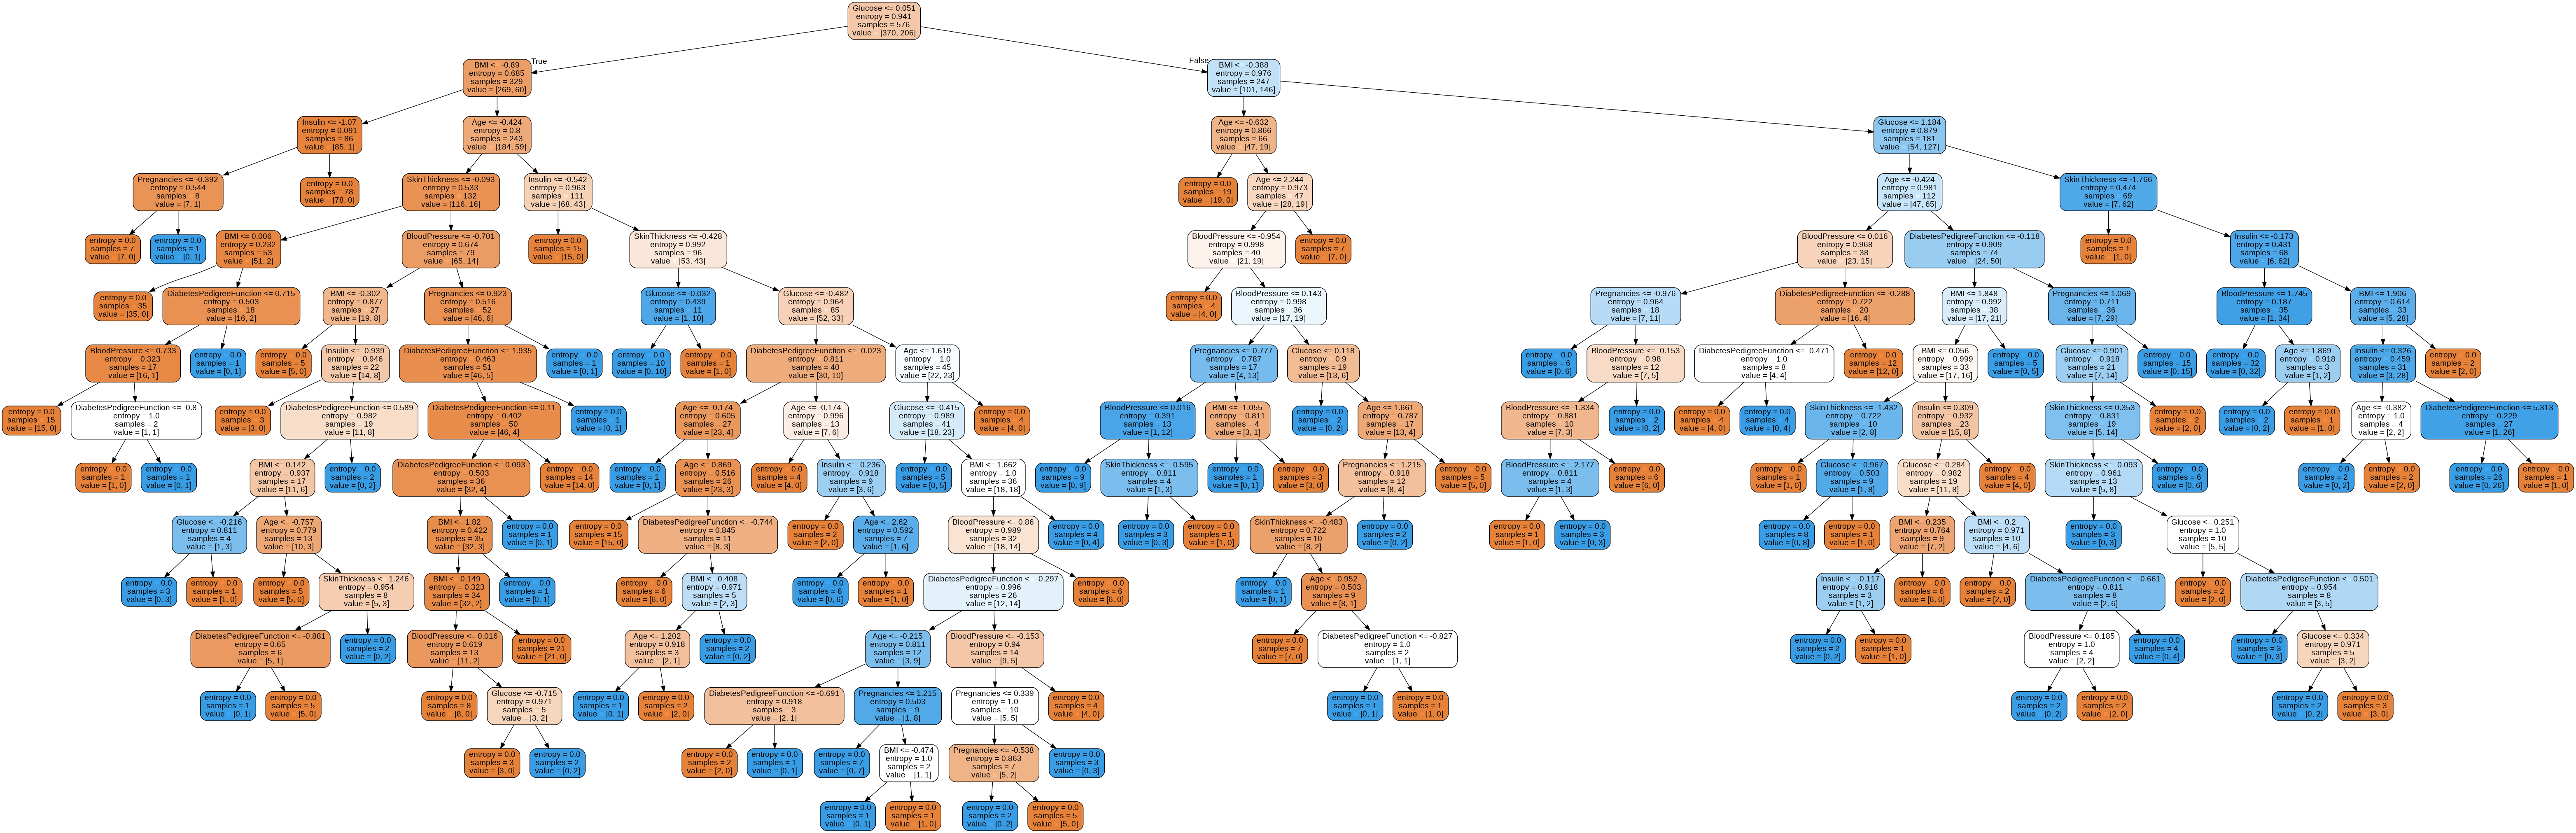

In [220]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(classifier6,out_file=dot_data,feature_names=list(X_df.columns),filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [221]:
print(res)

[76, 80, 76, 97, 74, 100]


In [222]:
print(res_a)

[78, 75, 78, 76, 77, 72]


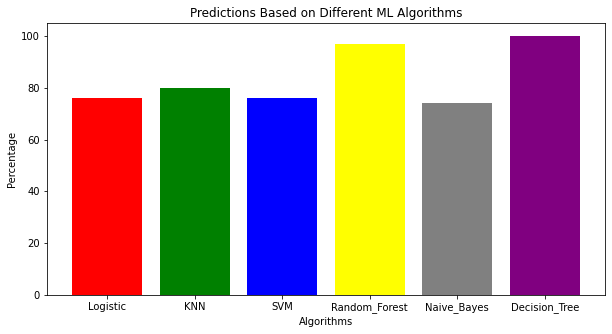

In [223]:
algo = ['Logistic', 'KNN', 'SVM', 'Random_Forest', 'Naive_Bayes', 'Decision_Tree']
plt.figure(figsize =(10, 5))
plt.bar(algo,res,color = ['red','green','blue','yellow','grey','purple'])
plt.title('Predictions Based on Different ML Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Percentage')
plt.show()

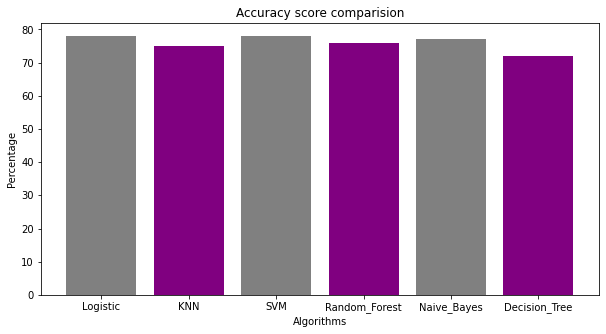

In [224]:
algo = ['Logistic', 'KNN', 'SVM', 'Random_Forest', 'Naive_Bayes', 'Decision_Tree']
plt.figure(figsize =(10, 5))
plt.bar(algo,res_a,color = ['grey','purple'])
plt.title('Accuracy score comparision')
plt.xlabel('Algorithms')
plt.ylabel('Percentage')
plt.show()